In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('data/wyniki_ankiety.csv')
df.head()

,Sygnatura czasowa,Jak często spożywa Pan/Pani napoje typu cola?,"Jakie napoje typu cola Pan/Pani preferuje? (Proszę wybrać wszystkie, które dotyczą)",W jakim rodzaju opakowania najczęściej kupuje Pan/Pani napoje typu cola?,Jakie smaki napojów typu cola preferuje Pan/Pani najbardziej?,Czy zawartość cukru w napoju wpływa na Pana/Pani wybór produktu?,"Czy uważa Pan/Pani, że napoje bez cukru są zdrowsze niż pełnocukrowe?",Jakie czynniki mają największy wpływ na Pana/Pani wybór napoju typu cola? (Proszę wybrać maksymalnie 3 odpowiedzi),Jak często uprawia Pan/Pani aktywność fizyczną?,Jaki rodzaj aktywności fizycznej Pan/Pani najczęściej wykonuje?,...,Marka: Pepsi\nZawartość cukru: Pełnocukrowa\nOpakowanie: Puszka aluminiowa\nSmak: Klasyczny,Marka: Coca-Cola\nZawartość cukru: Zero cukru\nOpakowanie: Szklana butelka\nSmak: Waniliowy,Marka: Pepsi\nZawartość cukru: Zero cukru\nOpakowanie: Puszka aluminiowa\nSmak: Waniliowy,Marka: Coca-Cola\nZawartość cukru: Pełnocukrowa\nOpakowanie: Szklana butelka\nSmak: Waniliowy,Płeć:,Wiek:,Miejsce zamieszkania:,Status edukacyjny:,Wykształcenie:,Miesięczny dochód na 1 osobę w rodzinie:
0,2025/03/25 9:46:26 AM EET,Rzadziej niż raz w miesiącu,Coca-Cola zero cukru;Marki rzemieślnicze zero ...,Plastikowa butelka,Smak klasyczny,5,5,Cena;Rodzaj opakowania;Zawartość cukru,Kilka razy w tygodniu,Fitness/siłownia,...,3,10,8,4,Mężczyzna,34,miasto powyżej 100 tys. mieszkańców,student,średnie,Powyżej 4000 zł
1,2025/04/01 1:48:28 PM EET,Kilka razy w miesiącu,Coca-Cola zero cukru;Pepsi zero cukru;Marki rz...,Plastikowa butelka,Smak klasyczny,5,5,Smak;Rodzaj opakowania;Zawartość cukru,Kilka razy w tygodniu,Bieganie,...,4,9,7,6,Kobieta,31,miasto powyżej 100 tys. mieszkańców,edukacja zakończona,wyższe,Powyżej 4000 zł
2,2025/04/02 9:09:01 AM EET,Kilka razy w tygodniu,Coca-Cola pełnocukrowa;Pepsi pełnocukrowa,Plastikowa butelka,Smak klasyczny,5,5,Smak,Nie uprawiam aktywności fizycznej,-,...,10,1,1,10,Mężczyzna,31,miasto powyżej 100 tys. mieszkańców,edukacja zakończona,wyższe,Powyżej 4000 zł
3,2025/04/03 8:38:45 PM EET,Kilka razy w tygodniu,Marki rzemieślnicze zero cukru (np. Fritz-kola...,Szklana butelka,Smak klasyczny,2,4,Marka;Rodzaj opakowania;Dostępność,Kilka razy w tygodniu,Fitness/siłownia,...,6,1,1,1,Mężczyzna,31,miasto do 100 tys.,edukacja zakończona,średnie,Powyżej 4000 zł
4,2025/04/03 8:39:25 PM EET,Kilka razy w tygodniu,Coca-Cola pełnocukrowa;Marka własna supermarke...,Puszka aluminiowa,Smak klasyczny,3,3,Smak;Dostępność,Kilka razy w tygodniu,Walking,...,7,1,1,1,Mężczyzna,53,miasto powyżej 100 tys. mieszkańców,edukacja zakończona,wyższe,Powyżej 4000 zł


In [14]:
df.drop(df.columns[14], axis=1, inplace=True)

In [9]:
df.head()

,Marka: Marka własna supermarketu\nZawartość cukru: Zero cukru\nOpakowanie: Puszka aluminiowa\nSmak: Owocowy,Marka: Marka rzemieślnicza\nZawartość cukru: Pełnocukrowa\nOpakowanie: Plastikowa butelka\nSmak: Waniliowy,Marka: Marka własna supermarketu\nZawartość cukru: Zero cukru\nOpakowanie: Szklana butelka\nSmak: Owocowy,Marka: Pepsi\nZawartość cukru: Pełnocukrowa\nOpakowanie: Szklana butelka\nSmak: Owocowy,Marka: Marka własna supermarketu\nZawartość cukru: Zero cukru\nOpakowanie: Szklana butelka\nSmak: Klasyczny,Marka: Coca-Cola\nZawartość cukru: Pełnocukrowa\nOpakowanie: Puszka aluminiowa\nSmak: Klasyczny,Marka: Coca-Cola\nZawartość cukru: Zero cukru\nOpakowanie: Plastikowa butelka\nSmak: Owocowy,Marka: Coca-Cola\nZawartość cukru: Pełnocukrowa\nOpakowanie: Szklana butelka\nSmak: Owocowy,Marka: Pepsi\nZawartość cukru: Zero cukru\nOpakowanie: Plastikowa butelka\nSmak: Waniliowy,Marka: Marka rzemieślnicza\nZawartość cukru: Zero cukru\nOpakowanie: Plastikowa butelka\nSmak: Owocowy,Marka: Pepsi\nZawartość cukru: Pełnocukrowa\nOpakowanie: Puszka aluminiowa\nSmak: Klasyczny,Marka: Coca-Cola\nZawartość cukru: Zero cukru\nOpakowanie: Szklana butelka\nSmak: Waniliowy,Marka: Pepsi\nZawartość cukru: Zero cukru\nOpakowanie: Puszka aluminiowa\nSmak: Waniliowy,Marka: Coca-Cola\nZawartość cukru: Pełnocukrowa\nOpakowanie: Szklana butelka\nSmak: Waniliowy,Płeć:,Wiek:,Miejsce zamieszkania:,Status edukacyjny:,Wykształcenie:,Miesięczny dochód na 1 osobę w rodzinie:
0,1,4,1,1,10,3,1,2,9,8,3,10,8,4,Mężczyzna,34,miasto powyżej 100 tys. mieszkańców,student,średnie,Powyżej 4000 zł
1,2,5,3,2,7,5,6,3,7,8,4,9,7,6,Kobieta,31,miasto powyżej 100 tys. mieszkańców,edukacja zakończona,wyższe,Powyżej 4000 zł
2,1,5,1,10,1,10,1,10,1,1,10,1,1,10,Mężczyzna,31,miasto powyżej 100 tys. mieszkańców,edukacja zakończona,wyższe,Powyżej 4000 zł
3,2,1,8,1,7,3,2,7,1,8,6,1,1,1,Mężczyzna,31,miasto do 100 tys.,edukacja zakończona,średnie,Powyżej 4000 zł
4,1,1,1,1,1,10,1,1,1,1,7,1,1,1,Mężczyzna,53,miasto powyżej 100 tys. mieszkańców,edukacja zakończona,wyższe,Powyżej 4000 zł


In [16]:
df.to_csv('data/wynik_ankiety_same_profile.csv', index=False)

### Przekształcenia tabel

#### Obróbka tabeli z cząstkowymi planami czynnikowymi (design)

Każdy wiersz tej tabeli to unikalny profil (1–14), kolumny to cztery zmienne kategoryczne:
- **Marka** (4 poziomy)
- **Zawartość cukru** (2 poziomy)
- **Opakowanie** (3 poziomy)
- **Smak** (3 poziomy)


In [65]:
design = pd.read_csv('data/czastkowy_plan_czynnikowy.csv')
design = design.rename(columns={'Numer profilu': 'profile_id'})
design['profile_id'] = design['profile_id'].astype(int)
cols_to_convert = design.columns[1:5]
design[cols_to_convert] = design[cols_to_convert].astype('category')
design.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   profile_id         14 non-null     int64   
 1   Marka              14 non-null     category
 2   Zawartość cukru    14 non-null     category
 3   Rodzaj opakowania  14 non-null     category
 4   Smak               14 non-null     category
dtypes: category(4), int64(1)
memory usage: 892.0 bytes


In [63]:
design.to_csv('data/design.csv', index=False)

#### Obróbka tabeli zawierającej wyniki ankiety (surveys)

In [66]:
# 1. Wczytaj tabelę
surveys = pd.read_csv('data/wynik_ankiety_same_profile.csv')

# 2. Zmień nazwy kolumn z opisowych na liczbowe, zgodne z profile_id z tabeli design
surveys.columns = [int(i) for i in range(1, 15)]
surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       101 non-null    int64
 1   2       101 non-null    int64
 2   3       101 non-null    int64
 3   4       101 non-null    int64
 4   5       101 non-null    int64
 5   6       101 non-null    int64
 6   7       101 non-null    int64
 7   8       101 non-null    int64
 8   9       101 non-null    int64
 9   10      101 non-null    int64
 10  11      101 non-null    int64
 11  12      101 non-null    int64
 12  13      101 non-null    int64
 13  14      101 non-null    int64
dtypes: int64(14)
memory usage: 11.2 KB


In [67]:
# 3. Melt: wide → long
surveys_long = (
    surveys
    .reset_index()   # dodaj respondent_id
    .melt(
        id_vars='index',
        value_vars=list(range(1, 15)),
        var_name='profile_id',
        value_name='rating'
    )
    .rename(columns={'index':'respondent_id'})
)
long.info()

In [80]:
surveys_long.to_csv('data/surveys_long.csv', index=False)

In [70]:
# 4. Merge: dołączenie informacji o atrybutach do każdej oceny
merged = surveys_long.merge(design, on='profile_id', how='left')
print('merged.shape:', merged.shape)
print(merged.head())

merged.shape: (1414, 7)
   respondent_id profile_id  rating                      Marka  \
0              0          1       1  Marka własna supermarketu   
1              1          1       2  Marka własna supermarketu   
2              2          1       1  Marka własna supermarketu   
3              3          1       2  Marka własna supermarketu   
4              4          1       1  Marka własna supermarketu   

  Zawartość cukru  Rodzaj opakowania     Smak  
0      Zero cukru  Puszka aluminiowa  Owocowy  
1      Zero cukru  Puszka aluminiowa  Owocowy  
2      Zero cukru  Puszka aluminiowa  Owocowy  
3      Zero cukru  Puszka aluminiowa  Owocowy  
4      Zero cukru  Puszka aluminiowa  Owocowy  


- `drop_first=True` oznacza, że dla każdego atrybutu pomijany jest pierwszy poziom (poziom odniesienia), co skutkuje utworzeniem `k−1` kolumn.

- W efekcie kodowania zmiennych kategorycznych powstają:
  - Dla **„Marka”** (4 poziomy) → **3 kolumny**
  - Dla **„Zawartość cukru”** (2 poziomy) → **1 kolumna**
  - Dla **„Opakowanie”** (3 poziomy) → **2 kolumny**
  - Dla **„Smak”** (3 poziomy) → **2 kolumny**

- Łącznie: **8 kolumn typu dummy** + ewentualna kolumna `rating`

---

### Finalny DataFrame `X`

**Wymiary:**
- **Wiersze:** 101 respondentów × 14 profili = **1414 obserwacji**
- **Kolumny:**
  - `rating` – zmienna objaśniana (Y)
  - 8 kolumn typu dummy – zmienne objaśniające (`X₁` … `X₈`)

In [71]:
# 5. Dummy coding dla czterech kategorycznych atrybutów
X = pd.get_dummies(
    merged[['Marka','Zawartość cukru','Rodzaj opakowania','Smak']],
    drop_first=True
)
Y = merged['rating']

print('X.shape:', X.shape)     # oczekiwane (101*14, 8)
print('Y.shape:', Y.shape)     # oczekiwane (101*14,)
print('X.columns:', X.columns.tolist())

X.shape: (1414, 8)
Y.shape: (1414,)
X.columns: ['Marka_Marka własna supermarketu', 'Marka_Marki rzemieślnicze', 'Marka_Pepsi', 'Zawartość cukru_Zero cukru', 'Rodzaj opakowania_Puszka aluminiowa', 'Rodzaj opakowania_Szklana butelka', 'Smak_Owocowy', 'Smak_Wanilia']


### Budowanie modelu regresji z wykorzystaniem pakietu 'scikit-learning'

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
# 1. Utworzenie modelu z interceptem
model = LinearRegression(fit_intercept=True) #parametr fit_intercept=True sprawia, że model automatycznie dopisze wyraz wolny i go wyliczy
# 2. Dopasowanie modelu do danych
model.fit(X, Y)

# 3. Wyniki estymacji
print(f"Intercept (β0): {model.intercept_:.4f}")
print("Coefficients (β1…β8):")
for name, coef in zip(X.columns, model.coef_):
    print(f"  {name:40s} : {coef:.4f}")

Intercept (β0): 5.9376
Coefficients (β1…β8):
  Marka_Marka własna supermarketu          : -0.9445
  Marka_Marki rzemieślnicze                : -0.5629
  Marka_Pepsi                              : -0.4125
  Zawartość cukru_Zero cukru               : -0.2083
  Rodzaj opakowania_Puszka aluminiowa      : 0.1328
  Rodzaj opakowania_Szklana butelka        : 0.0412
  Smak_Owocowy                             : -1.4681
  Smak_Wanilia                             : -1.7663


## Analiza i interpretacja wyników

Ogólna procedura modelowania symulacyjnego rynku w zakresie analizy udziałów w rynku na podstawie wyników uzyskanych metodą conjoint analysis obejmuje
następujące etapy (zob. [Walesiak, Bąk 2000, s. 73; Bąk 2004]):

### Oszacowanie indywidualnych użyteczności cząstkowych poziomów atrybutów w przekroju respondentów

Estymacja indywidualnych użyteczności cząstkowych sprowadza się do wytrenowania dla każdego respondenta osobnego modelu regresji liniowej z wcześniej przygotowaną macierzą dummy (X) i ocenami (Y).

#### Krok 1. Podział danych na poziomie respondenta

Z ramki `merged`, zawierającej kolumny:
- `respondent_id`
- `profile_id`
- kategorie atrybutów (zakodowane jako dummy w `X`)
- `rating` (zmienna objaśniana `Y`)
dzielimy dane na podzbiory odpowiadające poszczególnym respondentom.

#### Krok 2. Dopasowanie modelu regresji dla każdego respondenta

Dla każdego identyfikatora `s`:
1. Wyciągamy wiersze, w których `respondent_id == s`.
2. Tworzymy macierz `X_s` i wektor `Y_s`.
3. Dopasowujemy model.
```python
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_s, Y_s)
```
4. Zapisujemy wyraz wolny `β₀ₛ = model.intercept_` oraz współczynniki `βⱼₛ = model.coef_[j]` jako **użyteczności cząstkowe** odpowiadające poszczególnym poziomom atrybutów.



In [77]:
# merged → DataFrame z kolumnami respondent_id, rating, oraz dummy-kolumnami X.columns

# 1. Przygotuj pusty DataFrame na wyniki
respondents = merged['respondent_id'].unique()
part_worths = pd.DataFrame(index=respondents,
    columns=['Intercept'] + X.columns.tolist(),
    dtype=float)

# 2. Pętla po respondentach
for s in respondents:
    sub = merged[merged['respondent_id'] == s]
    X_s = pd.get_dummies(
        sub[['Marka','Zawartość cukru','Rodzaj opakowania','Smak']],
        drop_first=True
    )
    Y_s = sub['rating']

    # dopasowanie modelu
    model = LinearRegression(fit_intercept=True)
    model.fit(X_s, Y_s)

    # zapis parametrów
    part_worths.loc[s, 'Intercept'] = model.intercept_
    part_worths.loc[s, X_s.columns] = model.coef_

# 3. Użyteczności cząstkowe poziomów referencyjnych
#    (w dummy coding są równe 0 – to domyślny baseline)

print(part_worths.head())


   Intercept  Marka_Marka własna supermarketu  Marka_Marki rzemieślnicze  \
0   2.108868                        -3.473684                   4.759913   
1   5.214492                        -4.078947                   1.583273   
2   8.886085                        -1.842105                  -1.550108   
3   3.375631                        -0.210526                   4.098774   
4   6.563086                        -2.052632                  -1.122567   

   Marka_Pepsi  Zawartość cukru_Zero cukru  \
0     1.095169                    6.424658   
1    -1.100577                    4.267123   
2     0.118962                   -7.219178   
3     0.348234                    1.849315   
4    -1.176640                   -1.068493   

   Rodzaj opakowania_Puszka aluminiowa  Rodzaj opakowania_Szklana butelka  \
0                             0.790195                           4.046864   
1                            -0.062365                           1.393655   
2                             0.987

In [82]:
part_worths.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Intercept                            101 non-null    float64
 1   Marka_Marka własna supermarketu      101 non-null    float64
 2   Marka_Marki rzemieślnicze            101 non-null    float64
 3   Marka_Pepsi                          101 non-null    float64
 4   Zawartość cukru_Zero cukru           101 non-null    float64
 5   Rodzaj opakowania_Puszka aluminiowa  101 non-null    float64
 6   Rodzaj opakowania_Szklana butelka    101 non-null    float64
 7   Smak_Owocowy                         101 non-null    float64
 8   Smak_Wanilia                         101 non-null    float64
dtypes: float64(9)
memory usage: 12.0 KB


#### Omówienie

Każdy wiersz w `part_worths` to jeden respondent; kolumny to:

- **Intercept** – wyraz wolny modelu (użyteczność profilu referencyjnego)
- **Pozostałe kolumny** – współczynniki `βⱼₛ` odpowiadające zmiennym sztucznym (*part-worths*)

##### Kodowanie

- **Dummy coding**: Poziomy referencyjne (pierwszy poziom każdego atrybutu) mają wartość `0`.
- **Effects coding (quasi-eksperymentalne)**:
  Dla poziomu referencyjnego oblicza się part-worth jako *minus sumę* pozostałych `β` w danym atrybucie.

##### Zastosowania

Macierz indywidualnych użyteczności cząstkowych można wykorzystać do:

- obliczenia teoretycznych użyteczności całkowitych każdego profilu dla każdego respondenta,
- analizy względnej wagi atrybutów,
- segmentacji respondentów na podstawie ich wektorów *part-worth utilities*.

---

**Źródło:**
Orme, K. (1998) oraz Walesiak (2001) – indywidualna estymacja *part-worth utilities* poprzez oddzielne modele regresji dla każdego respondenta.


Użyteczności cząstkowe poziomów referencyjnych to wartości parametrów modelu conjoint analysis przypisane poziomom atrybutów, które służą jako punkt odniesienia (baseline) w kodowaniu zmiennych niemetrycznych. W standardowym kodowaniu zero-jedynkowym (dummy coding) ich użyteczność przyjmuje wartość zero, co pozwala interpretować pozostałe parametry w odniesieniu do poziomu referencyjnego. W innych schematach kodowania (np. quasi-eksperymentalnym) użyteczność poziomu referencyjnego oblicza się jako ujemną sumę wszystkich pozostałych użyteczności cząstkowych.

#### Notatki – Interpretacja Interceptu i współczynników zmiennych sztucznych

##### Co oznacza `Intercept`?

- `Intercept` (wyraz wolny) to estymowana użyteczność profilu **z poziomami referencyjnymi wszystkich atrybutów**.
- Jest to wartość użyteczności przyjmowana dla:
  - domyślnej marki (poziom referencyjny, kodowany przez wszystkie dummies = 0),
  - domyślnej zawartości cukru (np. „z cukrem” jako poziom referencyjny, kodowany jako 0),
  - domyślnego opakowania i smaku (także poziomy referencyjne).

##### Jak czytać współczynniki przy zmiennych sztucznych?

- Każdy współczynnik pokazuje zmianę użyteczności względem poziomu referencyjnego:
  - **wartość > 0** → wzrost użyteczności względem referencji,
  - **wartość < 0** → spadek użyteczności względem referencji.

---

##### Przykład (respondent 0):

- `Intercept = 2.11`
  → Estymowana użyteczność profilu: **Marka referencyjna + cukier**

- `Marka własna supermarketu = –3.47`
  → Obniża użyteczność o **3.47 pkt** względem marki referencyjnej

- `Marka rzemieślnicza = +4.76`
  → Podnosi użyteczność o **4.76 pkt** względem marki referencyjnej

- `Marka Pepsi = +1.10`
  → Lekki wzrost użyteczności względem referencji

- `Zero cukru = +6.42`
  → Znaczny wzrost użyteczności względem wariantu „z cukrem”

---

##### Zasady interpretacji:

- Traktuj **`Intercept`** jako **punkt odniesienia** dla profilu zawierającego poziomy referencyjne wszystkich atrybutów.
- Aby uzyskać prognozowaną użyteczność dowolnego profilu:
  - **dodaj do interceptu** wartości współczynników odpowiadających występującym poziomom (zmiennym sztucznym).
- **Porównuj wielkości współczynników**, by ocenić względne znaczenie poszczególnych poziomów atrybutów dla respondenta.

##### Zastosowanie:

- Umożliwia **odczytanie indywidualnych preferencji** respondenta.
- Pozwala **prognozować atrakcyjność** nowych kombinacji cech produktu.

---

**Źródła:**

- Walesiak, Z.; Bąk, K. – *„Kodowanie zero-jedynkowe…”*
- Green, P.; Srinivasan, V. – *„Model liniowy…”*

#### Krok 3. Obliczanie teoretycznej użyteczności całkowitej każdego profilu dla każdego respondenta

##### Wygeneruj macierz zmiennych sztucznych X_test na podstawie unikalnych profili w merged

In [86]:
# 1. Upewnij się, że profile_id ma typ liczbowy
merged['profile_id'] = merged['profile_id'].astype(int)

# 2. Wyciągnij unikalne profile z informacjami o atrybutach
unique_profiles = (
    merged[['profile_id','Marka','Zawartość cukru','Rodzaj opakowania','Smak']]
    .drop_duplicates(subset='profile_id')
    .sort_values('profile_id')
)

# 3. Dummy coding: stwórz zmienne sztuczne (drop_first=True → k−1 kolumn na atrybut)
X_test = pd.get_dummies(
    unique_profiles[['Marka','Zawartość cukru','Rodzaj opakowania','Smak']],
    drop_first=True
)

# 4. Ustaw index na profile_id
X_test.index = unique_profiles['profile_id']

# 5. Sprawdzenie
print(X_test.info())
print(X_test.head())

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 1 to 14
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Marka_Marka własna supermarketu      14 non-null     bool 
 1   Marka_Marki rzemieślnicze            14 non-null     bool 
 2   Marka_Pepsi                          14 non-null     bool 
 3   Zawartość cukru_Zero cukru           14 non-null     bool 
 4   Rodzaj opakowania_Puszka aluminiowa  14 non-null     bool 
 5   Rodzaj opakowania_Szklana butelka    14 non-null     bool 
 6   Smak_Owocowy                         14 non-null     bool 
 7   Smak_Wanilia                         14 non-null     bool 
dtypes: bool(8)
memory usage: 224.0 bytes
None
            Marka_Marka własna supermarketu  Marka_Marki rzemieślnicze  \
profile_id                                                               
1                                      True                      Fal

###### Wyjaśnienie

- `drop_duplicates` po `profile_id` eliminuje powtórki tych samych czterech cech, pozostawiając dokładnie tyle wierszy, ile unikalnych profili (14).

- `pd.get_dummies(..., drop_first=True)` tworzy dla każdego atrybutu \( k-1 \) kolumn zero-jedynkowych.

- Przypisanie indeksu `X_test.index = unique_profiles['profile_id']` pozwala łatwo powiązać przewidywane użyteczności z oryginalnymi profilami.

- Otrzymana ramka `X_test` (14×8 plan cząstkowy) jest gotowa do mnożenia przez macierz współczynników z modelu regresji celem prognozy łącznej użyteczności.


##### Oblicz teoretyczną użyteczność całkowitą każdego profilu dla każdego respondenta

##### Co robi każdy krok?

- **utility_df**
  Dla każdego respondenta `s` i profilu `i` liczy:
  $$
  U_{s,i} = \beta_{0s} + \sum_{j=1}^{8} \beta_{js} \, x_{ji}
  $$
  gdzie $x_{ji}$ to dummy z `X_test`.

- **importance**
  Dla każdego respondenta oblicza rozpiętość (max–min) part-worths w danym atrybucie (uwzględniając poziom referencyjny = 0), następnie dzieli przez sumę wszystkich czterech rozpiętości, mnoży przez 100%.

- **mean_importance**
  Uśrednia po wszystkich respondentach, dając procentowe znaczenie każdego atrybutu w badanej próbie.


In [88]:
# 1. Oblicz utility_df: respondenci × profile_id
utility_df = pd.DataFrame(
    index=part_worths.index,
    columns=X_test.index,
    dtype=float
)
for s in part_worths.index:
    β0 = part_worths.at[s, 'Intercept']
    coefs = part_worths.loc[s, X_test.columns]
    utility_df.loc[s] = β0 + X_test.dot(coefs)

# 2. Zdefiniuj dummy kolumny per atrybut
attributes = {
    'Marka': ['Marka_Marka własna supermarketu',
              'Marka_Marki rzemieślnicze','Marka_Pepsi'],
    'Zawartość cukru': ['Zawartość cukru_Zero cukru'],
    'Opakowanie': ['Rodzaj opakowania_Puszka aluminiowa',
                   'Rodzaj opakowania_Szklana butelka'],
    'Smak': ['Smak_Owocowy','Smak_Wanilia']
}
# 3. Oblicz użyteczność per respondent
importance = pd.DataFrame(
    index=part_worths.index,
    columns=attributes.keys(),
    dtype=float
)
for s in part_worths.index:
    # zakresy part-worths każdego atrybutu (+ poziom referencyjny = 0)
    ranges = {}
    for attr, cols in attributes.items():
        vals = part_worths.loc[s, cols].tolist() + [0]
        ranges[attr] = max(vals) - min(vals)
    total = sum(ranges.values())
    for attr in ranges:
        # unikamy dzielenia przez zero
        importance.at[s, attr] = (ranges[attr] / total * 100) if total else 0


##### Wyznacz wskaźniki relatywnego znaczenia poszczególnych atrybutów i ich wartości średnie.

In [89]:
# Średnie relatywne znaczenie atrybutów
mean_importance = importance.mean().round(2)

# Wyniki
print("Użyteczności całkowite (fragment):")
print(utility_df.iloc[:5, :5])
print("\n Wskaźnik relatywnego znaczenia (pierwsze 5):")
print(importance.iloc[:5])
print("\nŚrednie znaczenie atrybutów [%]:")
print(mean_importance)

Użyteczności całkowite (fragment):
profile_id         1         2         3          4         5
0          -0.181687  4.738284  3.074982   1.219178  9.106705
1           1.873828  5.401586  3.329849   2.041096  6.796323
2           0.772891  5.922855  1.093727  10.273973  1.133381
3           3.426099  1.792358  5.728911   4.438356  7.844989
4           1.609950  1.235761 -1.108868   0.835616  2.498919

 Wskaźnik relatywnego znaczenia (pierwsze 5):
       Marka  Zawartość cukru  Opakowanie       Smak
0  33.284757        25.972020   16.359662  24.383562
1  38.124712        28.731280    9.803636  23.340372
2  16.476860        60.655440   10.994669  11.873031
3  29.372451        12.605042   19.293331  38.729176
4  20.434970        10.637382   27.067183  41.860465

Średnie relatywne znaczenie [%]:
Marka              28.99
Zawartość cukru    20.82
Opakowanie         15.32
Smak               31.90
dtype: float64


##### Interpretacja

- Najwyższą wagę średnio uzyskał **smak** (31,90%), tuż za nim plasuje się **marka** (28,99%).
- Najmniejsze znaczenie ma **opakowanie** (15,32%), a **zawartość cukru** zajmuje pozycję środkową (20,82%).
- Zróżnicowanie wskaźników między respondentami wskazuje na heterogeniczność preferencji, co może uzasadniać dalszą segmentację.


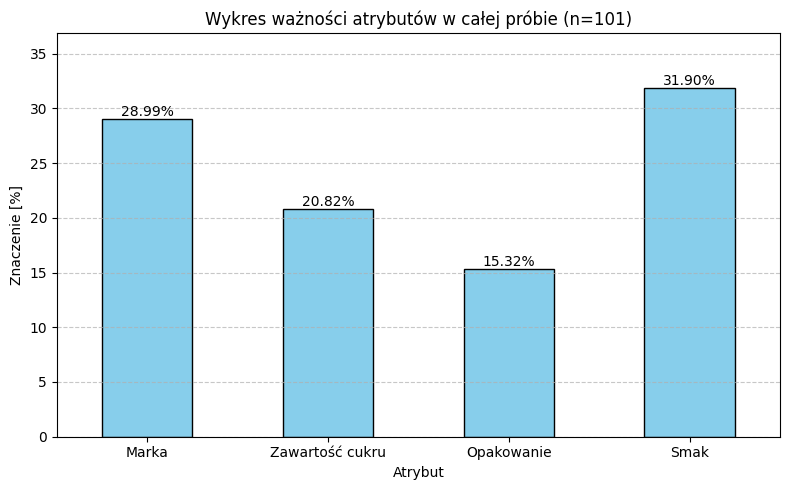

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = mean_importance.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.title('Wykres ważności atrybutów w całej próbie (n=101)')
plt.xlabel('Atrybut')
plt.ylabel('Znaczenie [%]')
plt.ylim(0, mean_importance.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Oblicz przeciętną teoretyczną użyteczność całkowitą

Poniżej pokazany jest sposób obliczenia przeciętnej (zagregowanej) teoretycznej użyteczności całkowitej każdego z 14 profili zgodnie ze wzorem:

$$
U_i = \frac{1}{S} \sum_{s=1}^{S} U_{si}
$$

gdzie $U_{si}$ to teoretyczna użyteczność i-tego profilu dla s-tego respondenta, a $S$ to liczba respondentów.


In [94]:
# 1. Obliczenie średniej użyteczności dla każdego profilu
average_utility = utility_df.mean(axis=0)

# 2. Zaokrąglenie do czterech miejsc po przecinku i wyświetlenie
average_utility = average_utility.round(4)
print("Przeciętna teoretyczna użyteczność całkowita dla każdego profilu:")
print(average_utility)

Przeciętna teoretyczna użyteczność całkowita dla każdego profilu:
profile_id
1     3.4496
2     3.6085
3     3.3580
4     4.0982
5     4.8261
6     6.0705
7     4.2613
8     4.5107
9     3.5506
10    3.6984
11    5.6579
12    4.0043
13    3.6834
14    4.2126
dtype: float64


In [96]:
# 1. Zamiana Series na DataFrame
avg_utility_df = average_utility.reset_index()
avg_utility_df.columns = ['profile_id', 'average_utility']

# 2. Wczytanie design i konwersja typów
design = pd.read_csv('data/design.csv', dtype={'profile_id': int})
for col in ['Marka','Zawartość cukru','Rodzaj opakowania','Smak']:
    design[col] = design[col].astype('category')

# 3. Scalenie po profile_id
avg_utility_df = avg_utility_df.merge(design, on='profile_id', how='left')

# 4. Uporządkowanie kolumn
cols = ['profile_id','Marka','Zawartość cukru','Rodzaj opakowania','Smak','average_utility']
avg_utility_df = avg_utility_df[cols]

# 5. Wynik
print(avg_utility_df)

    profile_id                      Marka Zawartość cukru   Rodzaj opakowania  \
0            1  Marka własna supermarketu      Zero cukru   Puszka aluminiowa   
1            2        Marki rzemieślnicze    Pełnocukrowa  Plastikowa butelka   
2            3  Marka własna supermarketu      Zero cukru     Szklana butelka   
3            4                      Pepsi    Pełnocukrowa     Szklana butelka   
4            5  Marka własna supermarketu      Zero cukru     Szklana butelka   
5            6                  Coca-Cola    Pełnocukrowa   Puszka aluminiowa   
6            7                  Coca-Cola      Zero cukru  Plastikowa butelka   
7            8                  Coca-Cola    Pełnocukrowa     Szklana butelka   
8            9                      Pepsi      Zero cukru  Plastikowa butelka   
9           10        Marki rzemieślnicze      Zero cukru  Plastikowa butelka   
10          11                      Pepsi    Pełnocukrowa   Puszka aluminiowa   
11          12              

In [97]:
avg_utility_df.to_csv('data/avg_utility_df.csv', index=False)

#### Kluczowe wnioski

- **Najwyższe preferencje uzyskał profil 6** (Coca-Cola, pełnocukrowa, puszka, klasyczny smak) – średnia użyteczność 6,07.
- **Profile z klasycznym smakiem** (5 i 6) osiągają wyraźnie wyższe wyniki niż te z owocowym lub waniliowym.
- **Marka Coca-Cola dominuje** w rankingach; własna marka supermarketu z zerowym cukrem i opakowaniem szklanym wypada najsłabiej (profil 3).
- Zestawiając te wyniki z wagami atrybutów (**smak ~31,9%**, **marka ~29%**, **cukier ~20,8%**, **opakowanie ~15,3%**) widać, że preferencja profili jest przede wszystkim napędzana przez smak i markę, a w mniejszym stopniu przez rodzaj opakowania czy zawartość cukru.
- Tak wygenerowana macierz teoretycznych użyteczności **dostarcza podstawy do segmentacji respondentów według wzorców preferencji poszczególnych profili**.

> Segmentacja preferencji konsumentów pozwala lepiej zrozumieć, które cechy produktu są dla nich najważniejsze i umożliwia skuteczniejsze kierowanie oferty do wybranych grup docelowych.
